In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
df1=pd.read_csv("E:\\mozilla download\\mcdonalds.csv")

In [4]:
df1.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
df1.replace({'Yes':1,'No':0},inplace=True)

In [7]:

df1['Like'].replace({'-3':3, '+2':2, '+1':1, '+4':4, 'I love it!+5':5, 'I hate it!-5':-5, '-2':-2, '+3':-3,'0':0, '-4':-4, '-1':-1},inplace=True)


In [77]:

df2=df1.drop(['Like','VisitFrequency','Age','Gender'],axis=1)
df2.columns


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [5]:
import seaborn as sns
# observ the correlation in the veriable anf factors

<Axes: >

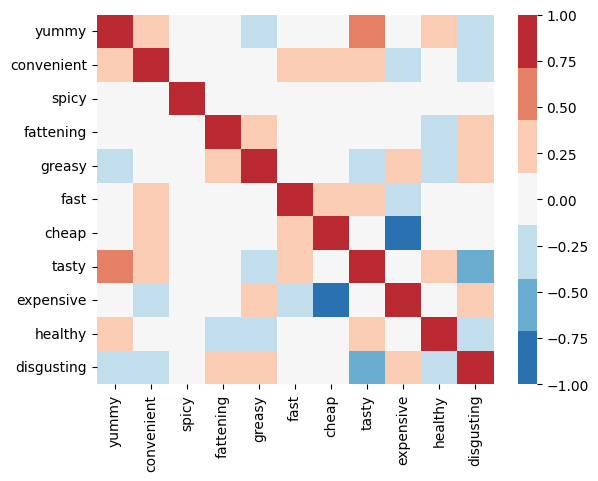

In [9]:
corr = df2.corr()
#sns.light_palette("purple")
sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 7), center = 0, vmin = -1, vmax = 1)

In [33]:
import scipy
import scipy.cluster.hierarchy as sch

X = df2.corr().values
d = sch.distance.pdist(X)  
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df2.columns.tolist()[i] for i in list((np.argsort(ind)))]
df2 = df2.reindex(columns, axis=1)
df2.head()

,yummy,tasty,healthy,convenient,fast,cheap,fattening,greasy,disgusting,expensive,spicy
0,0,0,0,1,1,1,1,0,0,1,0
1,1,1,0,1,1,1,1,1,0,1,0
2,0,1,1,1,1,0,1,1,0,1,1
3,1,1,0,1,1,1,1,1,1,0,0
4,0,0,1,1,1,1,1,1,0,0,0


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)

X = df1.drop(['Like','VisitFrequency','Age','Gender'],axis=1)
PC = pca.fit_transform(X)
PDf = pd.DataFrame(data = PC, columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11'])
PDf.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


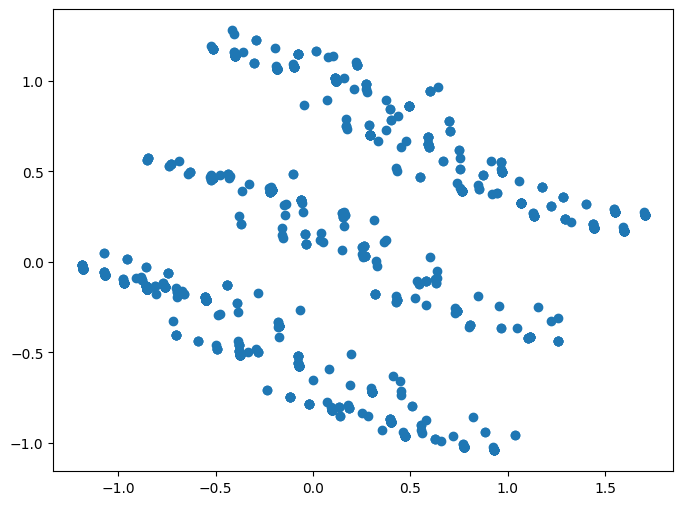

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(x=PDf.PCA1,y=PDf.PCA2)

In [12]:
# scree plot
from sklearn.preprocessing import StandardScaler

<BarContainer object of 11 artists>

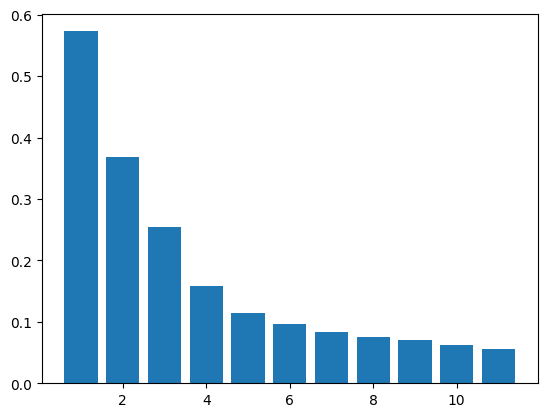

In [13]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

In [14]:
from sklearn.cluster import KMeans

<Axes: >

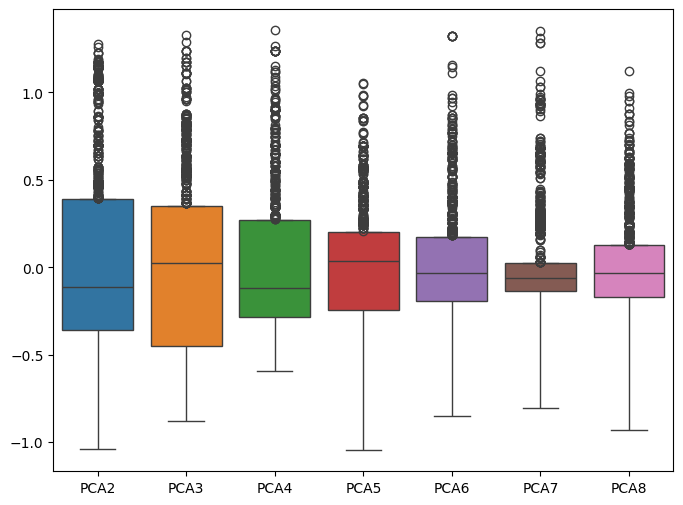

In [35]:
#vertical box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=PDf.drop(['PCA1','PCA9','PCA10','PCA11'],axis=1),whis=(0,2))


In [36]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [47]:
kmean=KMeans(n_clusters=4)
y=kmean.fit_predict(PDf)
PDf['clus']=y
PDf.head()


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,clus
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074,0
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440,2
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741,2
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034,1
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245,0


In [38]:
# plt.hist(PDf.drop(['clus','clusters'],axis=1) , bins=15)
df6=pd.concat([PDf,df1.Like],axis=1)


In [39]:
a=PDf[PDf['clus']==0]
b=PDf[PDf['clus']==1]
c=PDf[PDf['clus']==2]
d=PDf[PDf['clus']==3]

Text(0.5, 1.0, 'cluster4')

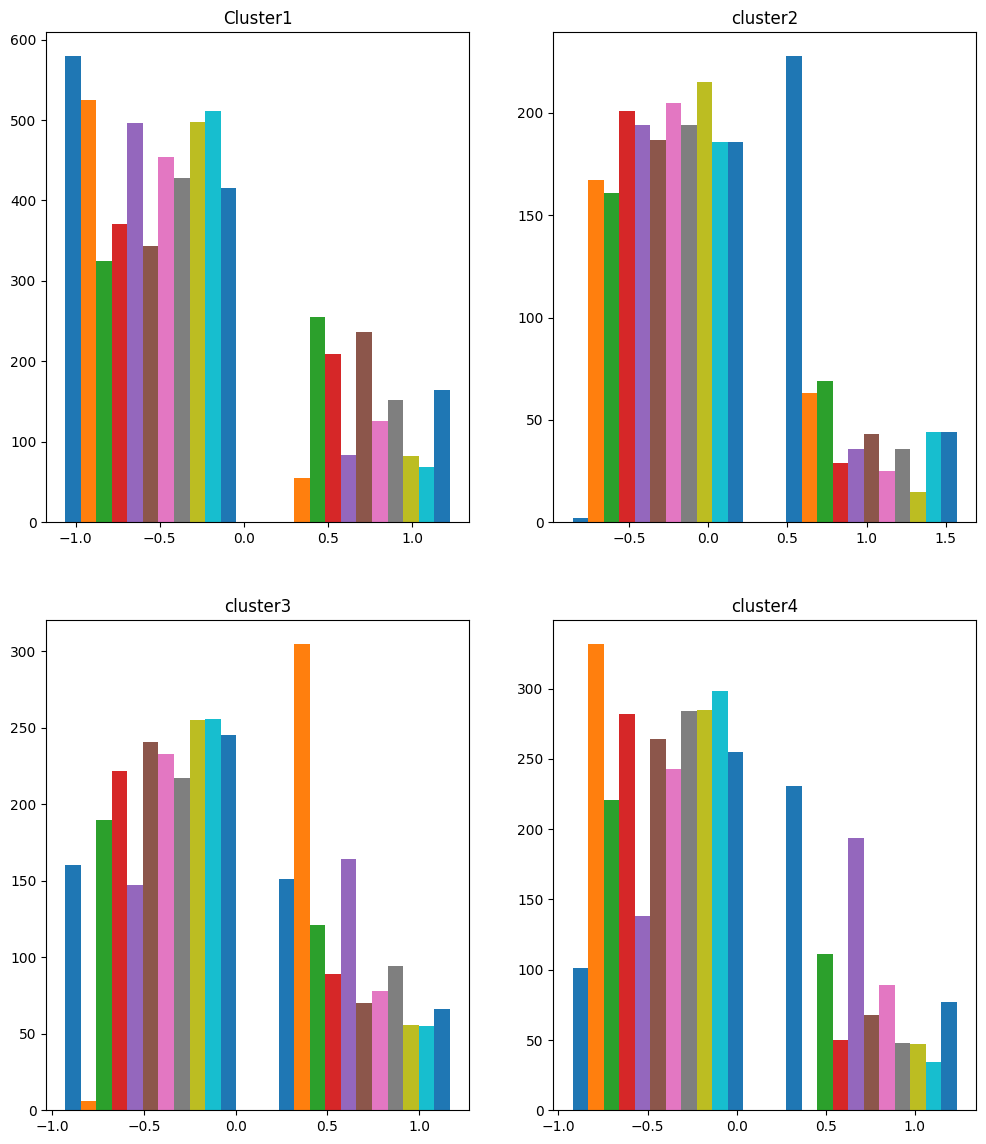

In [40]:
plt.subplot(2,2,1)

plt.hist(a.drop(['clus'],axis=1), bins = 2)

plt.title('Cluster1')

plt.subplot(2,2,2)

plt.hist(b.drop(['clus'],axis=1), bins = 2)

plt.title('cluster2')

plt.subplot(2,2,3)

plt.hist(c.drop(['clus'],axis=1), bins = 2)

plt.title('cluster3')

plt.subplot(2,2,4)

plt.hist(d.drop(['clus'],axis=1), bins = 2)

plt.title('cluster4')

In [118]:
PDf.clus.value_counts()

clus
1    480
0    445
2    293
3    235
Name: count, dtype: int64

In [41]:
df1.Like.replace({'-3':-3, '+2':2, '+1':1, '+4':4, 'I love it!+5':5, 'I hate it!-5':-5, '-2':-2, '+3':-3,'0':0, '-4':-4, '-1':-1},inplace=True)

In [42]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male


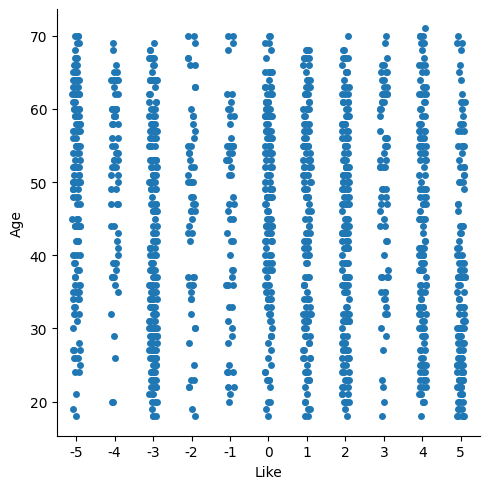

In [24]:
sns.catplot(x="Like", y="Age",data=df1, 
            orient="v", height=5)

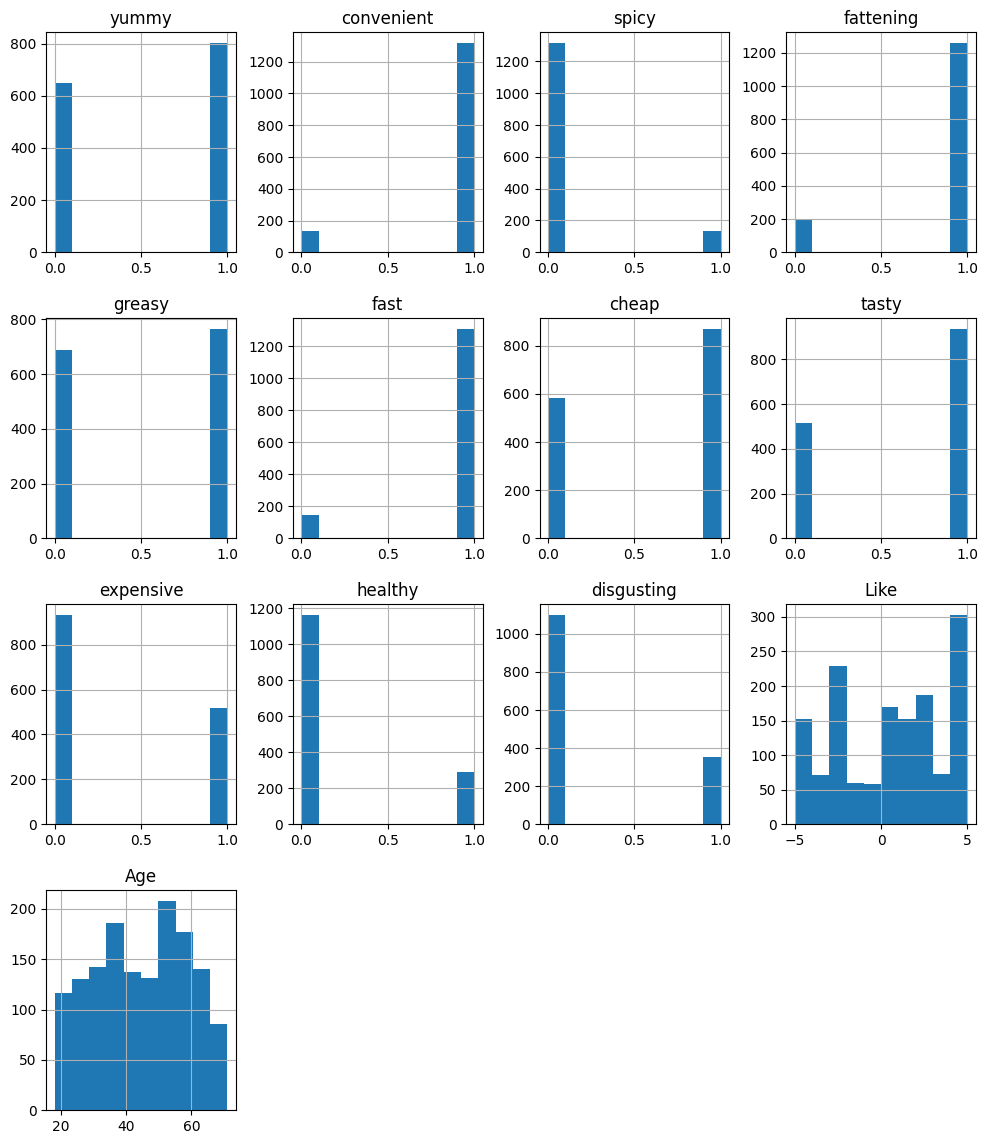

In [27]:
plt.rcParams['figure.figsize'] = (12,14)
df1.hist()
plt.show()

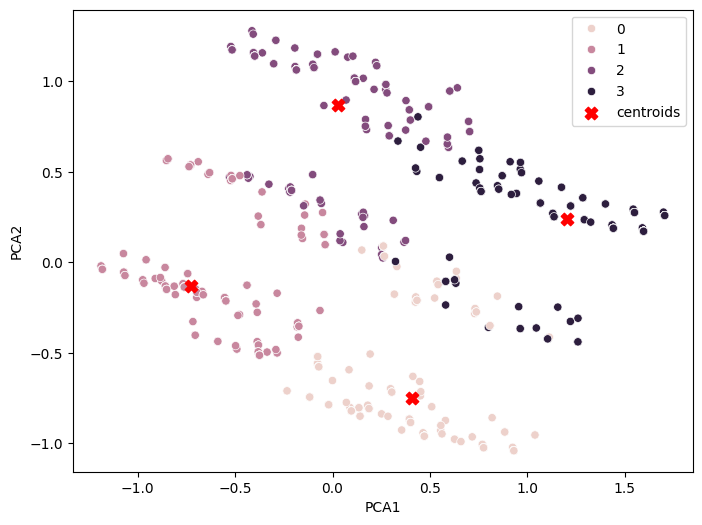

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=PDf, x="PCA1", y="PCA2", hue=kmean.labels_)
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")

plt.legend()
plt.show()

In [60]:
df2=pd.concat([df1,PDf.clus],axis=1)

In [63]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df2['clus'],df2['Like'])


Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
clus,,,,,,,,,,,
0,59,36,12,31,28,59,34,33,37,2,1
1,4,4,143,6,13,43,65,90,2,111,99
2,5,3,65,6,6,32,40,58,6,47,43
3,84,28,9,16,11,35,13,6,28,0,0


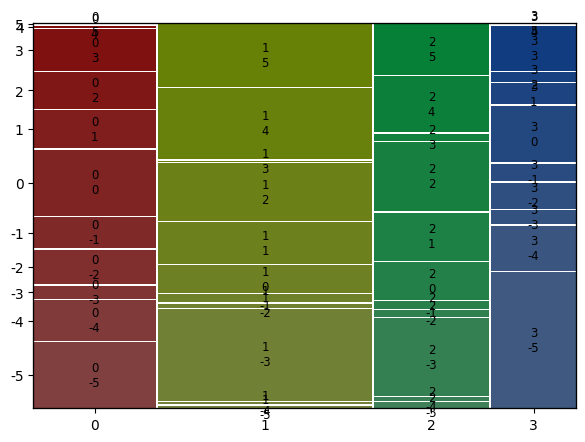

In [64]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [65]:
crosstab_gender =pd.crosstab(df2['clus'],df2['Gender'])
crosstab_gender

Gender,Female,Male
clus,,
0,194,138
1,349,231
2,149,162
3,96,134


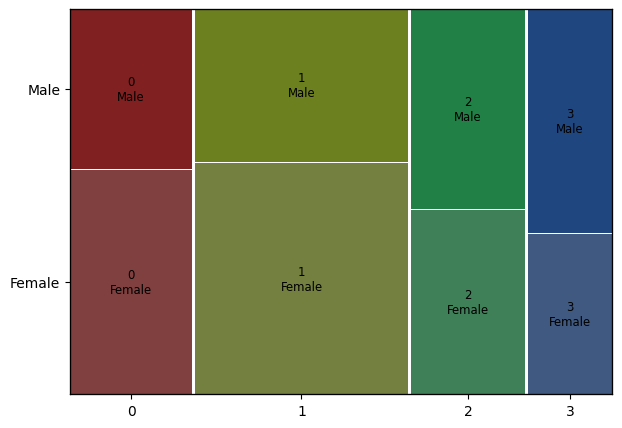

In [66]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='clus', ylabel='Age'>

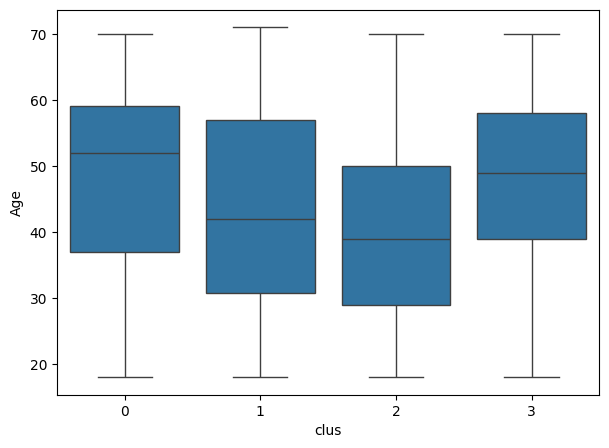

In [67]:
sns.boxplot(x="clus", y="Age", data=df2)

In [70]:
from sklearn.preprocessing import LabelEncoder
df2['VisitFrequency'] = LabelEncoder().fit_transform(df2['VisitFrequency'])
visit = df2.groupby('clus')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,clus,VisitFrequency
0,0,2.768072
1,1,2.584483
2,2,2.562701
3,3,2.686957


In [71]:
df2['Like'] = LabelEncoder().fit_transform(df2['Like'])
Like = df2.groupby('clus')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,clus,Like
0,0,3.972892
1,1,6.206897
2,2,6.051447
3,3,2.856522


In [72]:
df2['Gender'] = LabelEncoder().fit_transform(df2['Gender'])
Gender = df2.groupby('clus')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,clus,Gender
0,0,0.415663
1,1,0.398276
2,2,0.520900
3,3,0.582609


In [74]:
segment = Gender.merge(Like, on='clus', how='left').merge(visit, on='clus', how='left')
segment

,clus,Gender,Like,VisitFrequency
0,0,0.415663,3.972892,2.768072
1,1,0.398276,6.206897,2.584483
2,2,0.520900,6.051447,2.562701
3,3,0.582609,2.856522,2.686957


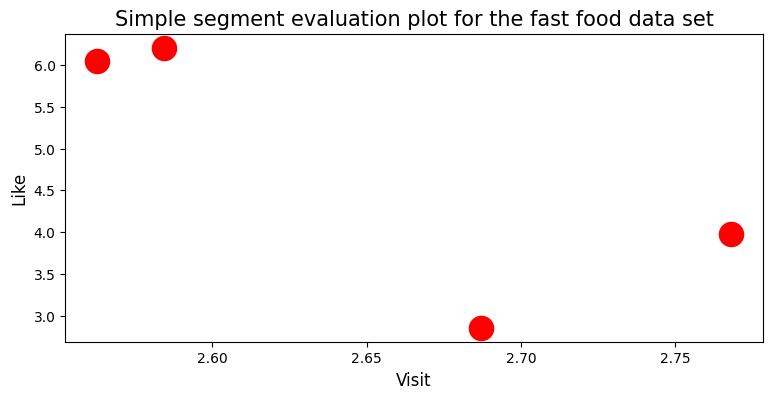

In [75]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()